In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from numpy import loadtxt
dataset = loadtxt('DatasetEEGProject.txt', dtype=float, delimiter=",", unpack=False)
print(dataset.shape)


from sklearn.model_selection import train_test_split
X_training_data,X_test_data,Y_training_data,Y_test_data =train_test_split(dataset[:,:64],dataset[:,64],test_size= 0.3,random_state=0)
print(X_training_data.shape)
print(X_test_data.shape)

(100, 65)
(70, 64)
(30, 64)


Text(0, 0.5, 'Avergae beta power accross trials')

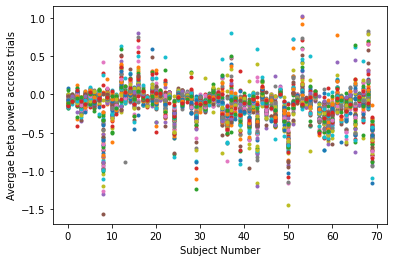

In [2]:
plt.plot(X_training_data,'.')
plt.xlabel("Subject Number")
plt.ylabel("Avergae beta power accross trials")

(64, 64)


(array([1.59943440e+00, 3.10289960e-01, 2.30483185e-01, 1.57122745e-01,
        6.98093583e-02, 4.81663787e-02, 4.43997153e-02, 3.71119066e-02,
        3.11940809e-02, 2.83801506e-02, 2.28583867e-02, 1.82850775e-02,
        1.49479362e-02, 1.39367163e-02, 1.27522460e-02, 1.16073478e-02,
        9.12322018e-03, 7.70681114e-03, 7.09539652e-03, 6.24129915e-03,
        5.54519691e-03, 5.29390421e-03, 4.57137302e-03, 4.28468897e-03,
        3.36273470e-03, 2.72382559e-03, 2.13609159e-03, 2.06598568e-03,
        1.72794070e-03, 1.60706571e-03, 1.50034639e-03, 1.21518521e-03,
        1.05419543e-03, 1.02877511e-03, 9.61570734e-04, 9.45656829e-04,
        8.71767231e-04, 6.00669031e-04, 5.75083293e-04, 4.82618255e-04,
        4.61105804e-04, 4.06511246e-04, 3.73125048e-04, 3.31985985e-04,
        2.06508066e-04, 1.83082296e-04, 1.55463067e-04, 1.32382788e-04,
        1.20757071e-04, 1.10904909e-04, 9.53775746e-05, 7.67807802e-05,
        5.33278206e-05, 4.48802475e-05, 3.77370607e-05, 3.509346

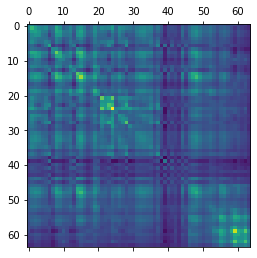

In [26]:
# PCA function 
def principalCA(X_training_data):
   # calculate the  covariance 
    C = np.cov(X_training_data.transpose())
    plt.matshow(C)
    print(C.shape)

    # Calcualte the eigenvalue and eigenvector of covariance matrix 
    eigval, eigvec = np.linalg.eig(C)
    print("Eigenvalue shape: ",eigval.shape)
    print("Eigenvector shape: ",eigvec.shape) 
    return eigval, eigvec
    

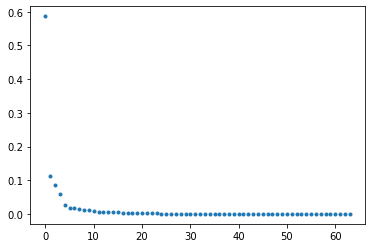

In [5]:
plt.plot(eigval/sum(eigval),'.')

In [15]:
# PCA for first two component 
Xpca = np.dot(X_training_data,eigvec[:,0:5])
print(X_training_data.shape)
print(Xpca.shape)

(70, 64)
(70, 5)


Text(0, 0.5, 'PCA 2')

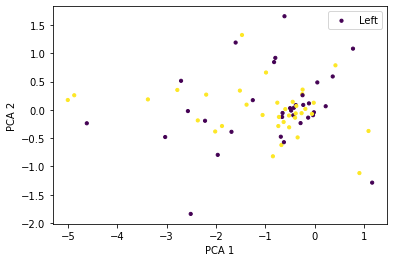

In [14]:
plt.scatter(Xpca[:,0],Xpca[:,1],10,Y_training_data)
plt.legend(['Left','Right'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

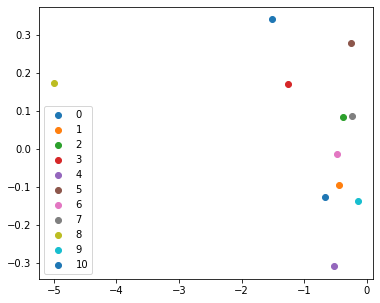

In [22]:
# plt.figure(figsize=(6,5))
# for i in range (5):
#     plt.scatter(Xpca[i,0],Xpca[i,1],cmap="plasma",label = i)
#     plt.legend()
#     plt.show

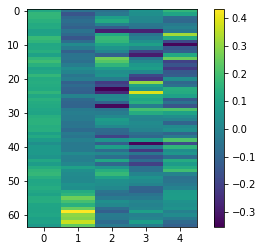

In [24]:
plt.imshow(eigvec[:,0:5],aspect=0.1)
plt.colorbar()